In [1]:
import Data.Imagenet as image_net
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from utils.visualization import show_images_grid 
from model.resnet import ResNet50
from torchsummary import summary
import torch
import torch.nn
from training.trainer import start_training
torch.cuda.empty_cache()

### Load the Imagenet Data

In [2]:
dataloader = image_net.ImagenetDataLoader()
train_loader = dataloader.get_train_loader()
test_loader = dataloader.get_test_loader()

#### Visualize 25 images from Dataset

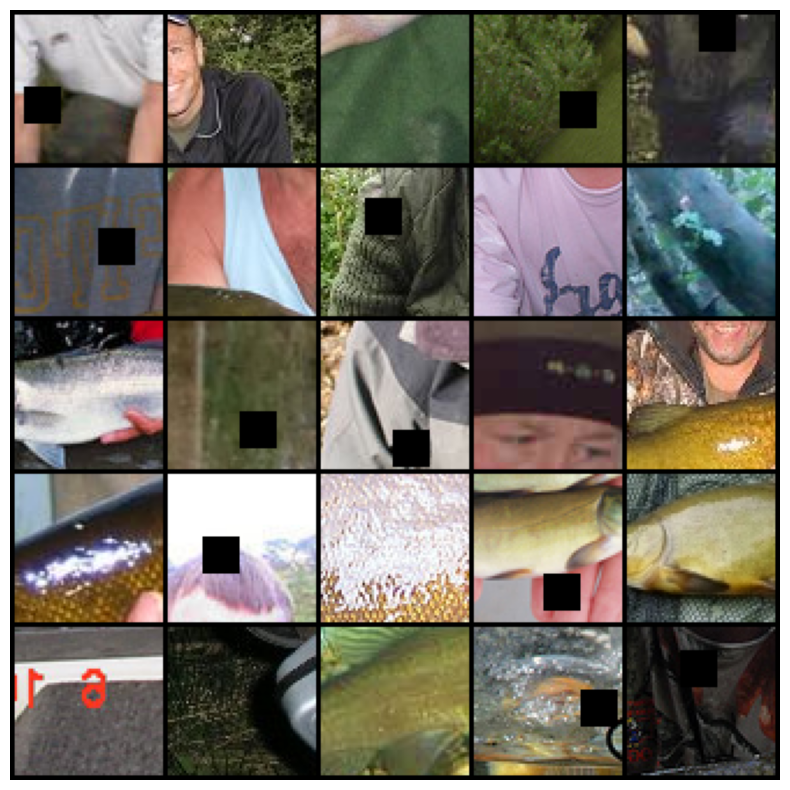

In [3]:

show_images_grid(train_loader, num_images=25, grid_size=(5, 5))


### RESNET 50 Model summary 

In [4]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(3,64,64)) 

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f'Device:{device}')
model = ResNet50(num_classes=1000).to(device)
print_summary(model,'Network summary')

Device:cuda
Network summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]           4,096
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
            Conv2d-7          [-1, 256, 64, 64]          16,384
       BatchNorm2d-8          [-1, 256, 64, 64]             512
            Conv2d-9          [-1, 256, 64, 64]          16,384
      BatchNorm2d-10          [-1, 256, 64, 64]             512
       Bottleneck-11          [-1, 256, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          16,384
      BatchNorm2d-13           [-1, 64, 64, 64]             128
           

In [6]:
## Set Hyperparameters
class Params:
    def __init__(self):
        self.batch_size = 128
        self.name = "ImageNet1k"
        self.workers = 12
        self.max_lr = 0.11  # Maximum learning rate as per lr finder
        self.momentum = 0.9
        self.weight_decay = 1e-4
        self.epochs = 3
        self.pct_start = 0.3  # Percentage of training where LR increases
        self.div_factor = 25.0  # Initial LR = max_lr/div_factor
        self.final_div_factor = 1e4  # Final LR = max_lr/final_div_factor

    def __repr__(self):
        return str(self.__dict__)

    def __eq__(self, other):
        return self.__dict__ == other.__dict__

params = Params()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

# Calculate steps per epoch
steps_per_epoch = len(train_loader)
    
# Define the OneCycleLR scheduler
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=params.max_lr,  # Set the maximum learning rate
    steps_per_epoch=steps_per_epoch,
    epochs=params.epochs,
    pct_start=params.pct_start,  # Percentage of cycle for increasing learning rate
    div_factor=params.div_factor,  # Initial LR = max_lr / div_factor
    final_div_factor=params.final_div_factor  # Minimum LR = max_lr / (div_factor * final_div_factor)
)

In [7]:

print(f'Device:{device}')
EPOCHS = 3
train_losses,test_losses,train_acc,test_acc=start_training(model,device,loss_fn,train_loader,test_loader,optimizer,scheduler,params,EPOCHS)

Device:cuda
 ***** EPOCH:0 ***** 
loss: 7.064147  [  128/1281167], 0.009991%
loss: 6.782987  [12928/1281167], 1.009080%
Done in  74.89068818092346  seconds
Remaining time (seconds):  7420.257147491108
loss: 6.659775  [25728/1281167], 2.008169%
Done in  75.0725314617157  seconds
Remaining time (seconds):  7363.201861387883
loss: 6.732253  [38528/1281167], 3.007258%
Done in  75.2318480014801  seconds
Remaining time (seconds):  7303.595966305565
loss: 6.951328  [51328/1281167], 4.006347%
Done in  75.58021450042725  seconds
Remaining time (seconds):  7261.835579764917
loss: 6.848058  [64128/1281167], 5.005436%
Done in  75.82485246658325  seconds
Remaining time (seconds):  7209.515829771719
loss: 6.952806  [76928/1281167], 6.004526%
Done in  75.80845355987549  seconds
Remaining time (seconds):  7132.148148944601
loss: 6.935520  [89728/1281167], 7.003615%
Done in  75.84502577781677  seconds
Remaining time (seconds):  7059.743880288768
loss: 7.394226  [102528/1281167], 8.002704%
Done in  75.7